In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../coba'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from learners.igw import IGWBanditLearner, SemiparametricIGWBanditLearner, EpsilonGreedyLearner

2022-02-02 17:03:54 -- Processing chunk...
2022-02-02 17:03:54 --   * Recording Learner 0 parameters... (0.0 seconds) (completed)
2022-02-02 17:03:54 --   * Recording Learner 1 parameters... (0.0 seconds) (completed)
2022-02-02 17:03:54 --   * Recording Learner 2 parameters... (0.0 seconds) (completed)
2022-02-02 17:03:54 --   * Recording Learner 3 parameters... (0.0 seconds) (completed)
2022-02-02 17:03:54 --   * Recording Learner 4 parameters... (0.0 seconds) (completed)
2022-02-02 17:03:54 --   * Recording Learner 5 parameters... (0.0 seconds) (completed)
2022-02-02 17:03:54 --   * Recording Learner 6 parameters... (0.0 seconds) (completed)
2022-02-02 17:04:02 --   * Loading Openml(id=180, cat_as_str=False)... (8.04 seconds) (completed)
2022-02-02 17:04:02 --   * Creating Environment 0 from Loaded Source... (0.0 seconds) (completed)
2022-02-02 17:04:03 --   * Recording Environment 0 statistics... (0.0 seconds) (completed)
2022-02-02 17:04:03 --   * Evaluating Learner 0 on Environmen

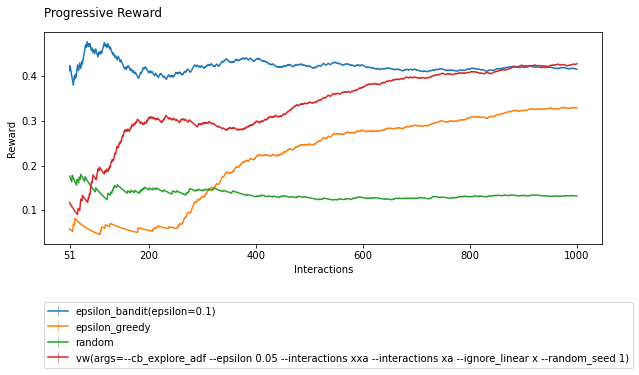

In [6]:
from coba.environments import Environments
from coba.learners     import RandomLearner, EpsilonBanditLearner, VowpalEpsilonLearner, LinUCBLearner
from coba.experiments  import Experiment

n_actions = 7
n_context_features = 54
n_interactions = 1000
environments = Environments.from_linear_synthetic(n_interactions=n_interactions,
                                                  n_actions=n_actions,
                                                  n_context_features=n_context_features,
                                                  r_noise_var=1/1000,
                                                  n_action_features=0).binary()

environments = Environments.from_openml(180,take=1000)

learners     = [RandomLearner(),
                EpsilonBanditLearner(0.1),
                VowpalEpsilonLearner(),
                IGWBanditLearner(n_actions, n_context_features, do_feature_selection=False),
                SemiparametricIGWBanditLearner(n_actions, n_context_features),
               EpsilonGreedyLearner(n_actions, .1),
               LinUCBLearner()]

Experiment(environments, learners).evaluate().plot_learners()

2022-02-02 15:43:20 -- Processing chunk...
2022-02-02 15:43:20 --   * Recording Learner 0 parameters... (0.0 seconds) (completed)
2022-02-02 15:43:20 --   * Recording Learner 1 parameters... (0.0 seconds) (completed)
2022-02-02 15:43:20 --   * Recording Learner 2 parameters... (0.0 seconds) (completed)
2022-02-02 15:43:20 --   * Recording Learner 3 parameters... (0.0 seconds) (completed)
2022-02-02 15:43:21 --   * Loading LambdaSimulation... (0.41 seconds) (completed)
2022-02-02 15:43:21 --   * Creating Environment 0 from Loaded Source... (0.0 seconds) (completed)
2022-02-02 15:43:21 --   * Recording Environment 0 statistics... (0.0 seconds) (completed)
2022-02-02 15:43:21 --   * Evaluating Learner 0 on Environment 0... (0.18 seconds) (completed)
2022-02-02 15:43:25 --   * Evaluating Learner 1 on Environment 0... (4.12 seconds) (completed)
0.45676046833606765
0.5340937551341861
0.6008876513225028
0.6583324982139542
0.7091173926394401
0.7549660099681237
0.7969967772708473
0.835972241627

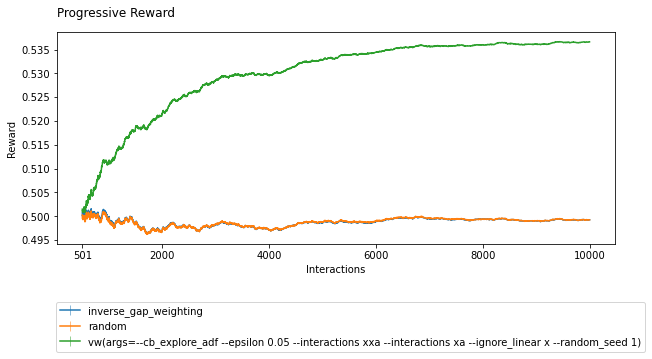

In [5]:
from typing import Sequence

from coba.random       import CobaRandom
from coba.environments import LambdaSimulation, Context, Action
from coba.learners     import RandomLearner, VowpalArgsLearner
from coba.experiments  import Experiment

r = CobaRandom(1)
n_interactions = 10000

def context(index: int) -> Context:
    return tuple(r.randoms(10))

def actions(index: int, context: Context) -> Sequence[Action]:
    actions = [ r.randoms(10) for _ in range(3) ]
    return [ tuple(a/sum(action) for a in action) for action in actions ]

def rewards(index: int, context: Context, action: Action) -> float:
    return sum(c*a for c,a in zip(context,action))

environments = [LambdaSimulation(n_interactions, context, actions, rewards)]
learners = [RandomLearner(), VowpalArgsLearner(), IGWBanditLearner(3, 10, False), SemiparametricIGWBanditLearner(3,10)]


Experiment(environments, learners).evaluate().plot_learners()